<a href="https://colab.research.google.com/github/Arthur6363/Data-Science-ML/blob/main/Phone_price_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("modelpricetrain.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df["price_range"].unique()

array([1, 2, 3, 0])

In [10]:
df.head(3)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


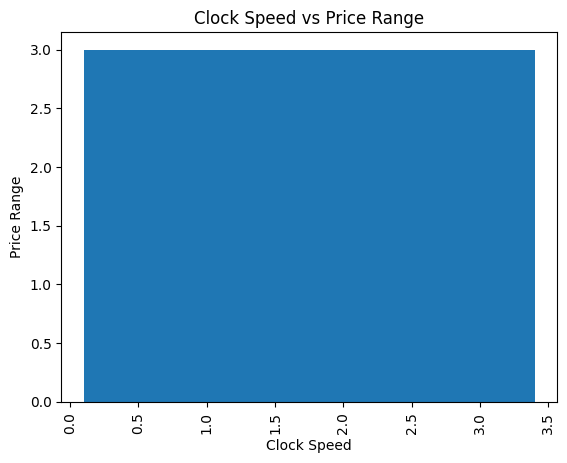

In [12]:
# prompt: clock_speed ,  price_range  matplot

import matplotlib.pyplot as plt

# Extract data for clock speed and price range
clock_speed = df["clock_speed"].values
price_range = df["price_range"].values

# Create the bar plot
plt.bar(clock_speed, price_range)

# Add labels and title
plt.xlabel("Clock Speed")
plt.ylabel("Price Range")
plt.title("Clock Speed vs Price Range")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [14]:
x = df.drop(["price_range"], axis=1)
y = df["price_range"]

In [15]:
x_train, x_test , y_train, y_test = train_test_split(x,y, random_state=63, test_size=0.2)

In [16]:
from sklearn import svm

In [18]:
sv = svm.SVC(kernel='linear')
model = sv.fit(x_train,y_train)
model.score(x_test,y_test)

0.9675

In [21]:
model.predict(x_test)

array([1, 3, 0, 1, 0, 1, 2, 2, 0, 2, 2, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 3,
       1, 2, 3, 3, 3, 0, 1, 3, 2, 2, 2, 3, 3, 3, 3, 2, 1, 3, 0, 3, 0, 3,
       2, 3, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 3, 2, 0, 3, 2, 1, 0, 3, 3, 0,
       0, 1, 2, 2, 1, 0, 2, 0, 1, 3, 2, 1, 1, 0, 3, 1, 3, 2, 2, 1, 2, 3,
       2, 3, 2, 0, 1, 0, 3, 0, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 0, 3, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 2, 3, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0, 2, 3, 3, 3, 2, 1, 2, 1, 3, 3, 2,
       2, 3, 2, 0, 1, 0, 2, 2, 0, 3, 3, 0, 3, 3, 2, 3, 3, 3, 1, 0, 1, 1,
       2, 3, 0, 1, 0, 3, 3, 2, 3, 2, 3, 1, 0, 3, 0, 1, 1, 3, 1, 2, 0, 2,
       3, 2, 2, 3, 1, 0, 2, 1, 0, 3, 2, 0, 3, 1, 2, 1, 3, 3, 0, 0, 1, 0,
       0, 2, 1, 1, 1, 3, 1, 3, 1, 0, 1, 2, 0, 2, 1, 3, 3, 0, 1, 3, 3, 0,
       2, 1, 0, 1, 3, 1, 1, 3, 0, 2, 1, 1, 3, 3, 3, 0, 3, 0, 3, 1, 3, 1,
       0, 2, 3, 1, 1, 3, 1, 0, 1, 1, 3, 1, 2, 2, 2, 3, 0, 1, 2, 2, 1, 3,
       2, 3, 0, 2, 1, 2, 3, 2, 0, 3, 1, 1, 0, 3, 0,

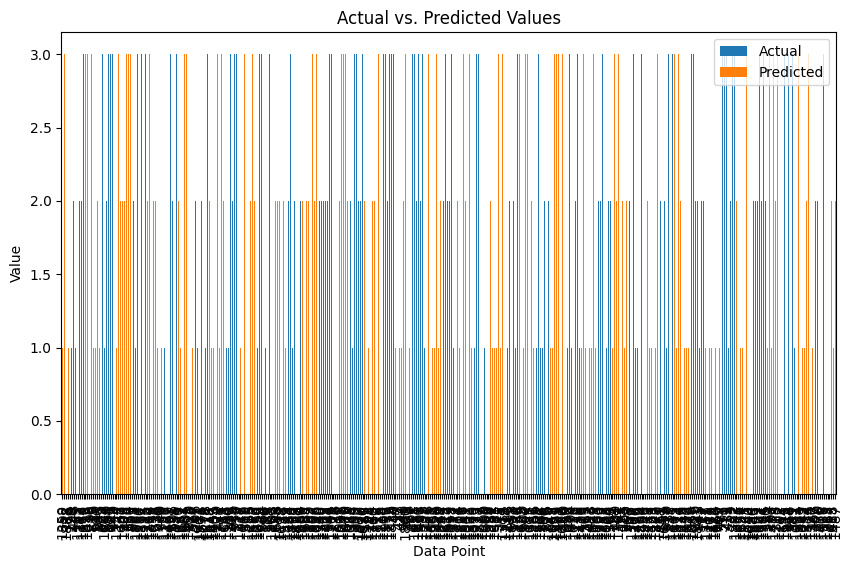

In [24]:
results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": model.predict(x_test)
})

results_df.plot(kind="bar", figsize=(10, 6))

plt.xlabel("Data Point")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")

plt.show()
